# Repaso

Media: promedio

Mediana: valor del centro

Moda: valor que más se repite

Desviación estándar: dispersión de los datos

## Ejemplo
Supongamos que tenemos dos tipos de programadores que queremos evaluar.

*   Tipo A: programadores con poca experiencia laboral
*   Tipo B: programadores con mucha experiencia laboral

Supongamos que a cada programador se le dio el mismo código con exactamente 100 errores. Se hizo una evaluación donde se obtenía la cantidad de errores encontrados. 

Usando la biblioteca statistics se pueden encontrar la media, mediana y moda de la sigueinte forma. 

Nota: también se podrían encontrar esos mismos valores aplicando las fórmulas correspondientes. 

In [ ]:
import statistics as st
import pandas as pd

In [ ]:
#Definir el conjunto de datos
df = pd.DataFrame({'tipo': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
                              'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
                   'errores_encontrados': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,
                             84, 88, 88, 89, 90, 90, 91]})

In [ ]:
#Separamos los grupos para poderlos analizar independientemente
grupoA = df[df['tipo']=='A']
grupoB = df[df['tipo']=='B']

In [ ]:
#Calculemos los estadísticos de grupoA

print ("Media = " + str((st.mean(grupoA['errores_encontrados']))))
print ("Mediana = " + str((st.median(grupoA['errores_encontrados']))))
print ("Moda = " + str((st.mode(grupoA['errores_encontrados']))))
print ("Desviación estándar = " + str((st.pstdev(grupoA['errores_encontrados']))))

Media = 79.4
Mediana = 79.5
Moda = 72
Desviación estándar = 6.711184694225007


In [ ]:
#Muchas otras bibliotecas hacen lo mismo
import numpy as np

print ("Media = " + str((np.mean(grupoA['errores_encontrados']))))
print ("Mediana = " + str((np.median(grupoA['errores_encontrados']))))


#mode no existe en numpy...
#print ("Moda = " + str((np.mode(grupoA['errores_encontrados']))))


Media = 79.4
Mediana = 79.5


In [ ]:
#Pero se pueden usar otras bibliotecas que incluso dan más información

from scipy.stats import stats

print ("Moda = " + str((stats.mode(grupoA['errores_encontrados']))))

Moda = ModeResult(mode=array([72]), count=array([2]))


<ipython-input-6-febdcc47f288>:5: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print ("Moda = " + str((stats.mode(grupoA['errores_encontrados']))))
<ipython-input-6-febdcc47f288>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print ("Moda = " + str((stats.mode(grupoA['errores_encontrados']))))


In [ ]:
#Calculemos los estadísticos de grupoB

print ("Media = " + str((st.mean(grupoB['errores_encontrados']))))
print ("Mediana = " + str((st.median(grupoB['errores_encontrados']))))
#si más de un valor para la moda, la siguiente línea da un error usando mode la biblioteca statistics
#print ("Moda = " + str((st.mode(grupoB['errores_encontrados'])))) #esta línea genera un error!

Media = 86.2
Mediana = 88.0


In [ ]:
#Y si usamos el cálculo de la moda de stats?

print ("Moda = " + str((stats.mode(grupoB['errores_encontrados'])))) #nos muestra solo la primera moda

Moda = ModeResult(mode=array([81]), count=array([2]))


<ipython-input-8-ce6fcf849dac>:3: DeprecationWarning: Please use `mode` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print ("Moda = " + str((stats.mode(grupoB['errores_encontrados'])))) #nos muestra solo la primera moda
<ipython-input-8-ce6fcf849dac>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print ("Moda = " + str((stats.mode(grupoB['errores_encontrados'])))) #nos muestra solo la primera moda


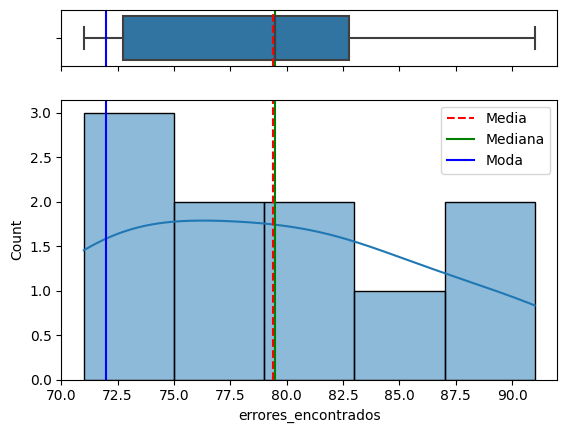

In [ ]:
#Y si queremos graficar?

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df = grupoA

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['errores_encontrados'].mean()
median=df['errores_encontrados'].median()
mode=df['errores_encontrados'].mode().values[0]

sns.boxplot(data=df, x="errores_encontrados", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="errores_encontrados", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Media")
ax_hist.axvline(median, color='g', linestyle='-', label="Mediana")
ax_hist.axvline(mode, color='b', linestyle='-', label="Moda")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

# Prueba T

**¿Qué es la inferencia estadística?**

La inferencia estática es el arte de generar conclusiones a partir de la distribución de los datos. Un investigador a menudo está expuesto a preguntas que solo pueden responderse científicamente. Por lo tanto, la inferencia estadística es una estrategia para probar si una hipótesis es verdadera, es decir, validada por los datos.

Una estrategia común para evaluar la hipótesis es realizar una prueba t. Una prueba t puede determinar si dos grupos tienen la misma media (suma de los datos, dividida entre la cantidad de los datos). Una prueba t también se llama prueba t de student. Se puede estimar una prueba t para:

-	Un solo vector (es decir, prueba t de una muestra)
-	Dos vectores del mismo grupo de muestra (es decir, prueba t pareada). Supone que ambos vectores son muestreados al azar, independientes y provienen de una población normalmente distribuida con variaciones desconocidas pero iguales.

La idea básica detrás de una prueba t es usar estadística para evaluar dos hipótesis contrarias:

H0 - hipótesis nula: el promedio es el mismo que la muestra utilizada

H1 - hipótesis alternativa: el promedio es diferente de la muestra utilizada

La prueba t se usa comúnmente con muestras pequeñas (30 individuos o menos). Para realizar una prueba t, debe suponer la normalidad de los datos.


In [ ]:
#Cargar bibliotecas
import pandas as pd
from scipy.stats import ttest_ind

In [ ]:
#Definir el conjunto de datos

df = pd.DataFrame({'tipo': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
                              'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
                   'errores_encontrados': [71, 72, 72, 75, 78, 81, 82, 83, 89, 91, 80, 81, 81,
                             84, 88, 88, 89, 90, 90, 91]})

#Separamos los grupos para poderlos analizar independientemente
grupoA = df[df['tipo']=='A']
grupoB = df[df['tipo']=='B']

H0: media de grupoA = media de grupoB

H1: media de grupoA != media de grupoB

¿Cómo se interpreta?

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=99443bbe00f5efcfc3ec98193f12b9a131f31c2d6a6f7b2c534cbe56d4d9c0c7
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
#primero debo verificar si datos son normales

# Test de Shapiro-Wilk
import pingouin as pg
pg.normality(data=df, dv='errores_encontrados', group='tipo')

,W,pval,normal
tipo,,,
A,0.92438,0.394935,True
B,0.85322,0.063440,True


p_value > 0.05 (nivel de significancia)

No podemos rechazar la hipótesis nula (H0: datos son normales) 

**Por lo tanto** podemos afirmar (usando Shapiro-Wilk) que la muestra si tiene una distribución normal.

In [ ]:
#verificar homocedasticidad

# Test de Levene
pg.homoscedasticity(data=df, dv='errores_encontrados', group='tipo')

,W,pval,equal_var
levene,2.665296,0.119929,True


H0: los grupos tienen igualdad de varianzas

H1: los grupos no tienen igualdad de variazas




In [ ]:
ttest_ind(grupoA['errores_encontrados'], grupoB['errores_encontrados'])

Ttest_indResult(statistic=-2.6034304605397938, pvalue=0.017969284594810425)

Para evaluar la significación estadística de la prueba t, debe calcular el valor p. El valor p varía de 0 a 1, y se interpreta de la siguiente manera:

*   Un valor p inferior a 0.05 significa que tiene mucha confianza para rechazar la hipótesis nula, por lo tanto, se acepta H1.
*   Un valor p superior a 0.05 indica que se no tienen suficientes evidencias para rechazar la hipótesis nula.

El resultado anterior implica que rechazamos H0 (porque p < 0.05), por tanto sí hay diferencia entre los grupos. 



Práctica

In [ ]:
# import libraries
import pandas as pd
from scipy.stats import ttest_ind
# load dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/datasets/cereal.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Hipótesis experimental: El tipo de cereal influye en la cantidad de azúcares del mismo.

In [ ]:
#Separamos los grupos para poderlos analizar independientemente
grupoA = df[df['type']=='C']
grupoB = df[df['type']=='H']

#grupoA.head()
grupoB.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=77a79dce2df62b630cad26bdc5441cb671ba39f790029c93b3b6e66b3e995073
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


H0: la media de azúcar en grupoA == media de azúcar en grupoB



H1: la media de azúcar en grupoA != media de azúcar en grupoB

In [ ]:
#primero debo verificar si datos son normales

# Test de Shapiro-Wilk
import pingouin as pg
pg.normality(data=df, dv='sugars', group='type')

# para efectos de la práctica asumimos que son normales.

/usr/local/lib/python3.9/dist-packages/pingouin/distribution.py:242: UserWarning: Group H has less than 4 valid samples. Returning NaN.
  warnings.warn(f"Group {idx} has less than 4 valid samples. Returning NaN.")


,W,pval,normal
type,,,
C,0.95165,0.00661,False
H,NaN,NaN,False


In [ ]:
#verificar homocedasticidad

# Test de Levene
pg.homoscedasticity(data=df, dv='sugars', group='type')

,W,pval,equal_var
levene,3.451725,0.067111,True


In [ ]:
ttest_ind(grupoA['sugars'], grupoB['sugars'])

Ttest_indResult(statistic=2.5771174568555164, pvalue=0.011926461307550878)

 Como nuestro p-value es menor a 0.05, tenemos mucha confianza para rechazar H0 y por ende aceptar H1. 
 En nuestro caso: aceptamos que la media de azúcares del grupoA != la media de azúcares del grupoB